Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

Sample Data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

 Ensemble Learning Explanation:
A Random Forest is an ensemble of Decision Trees.
Instead of relying on one tree, it builds many trees on random subsets of data and features.
The final prediction is made by majority voting among trees — reducing overfitting and improving accuracy.

Training Accuracy: 1.0
Testing Accuracy: 1.0

Classification Report (Test Set):
 

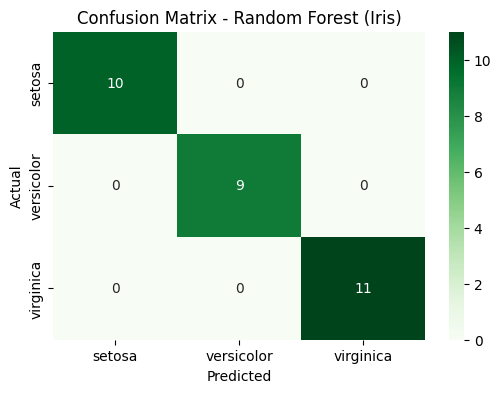

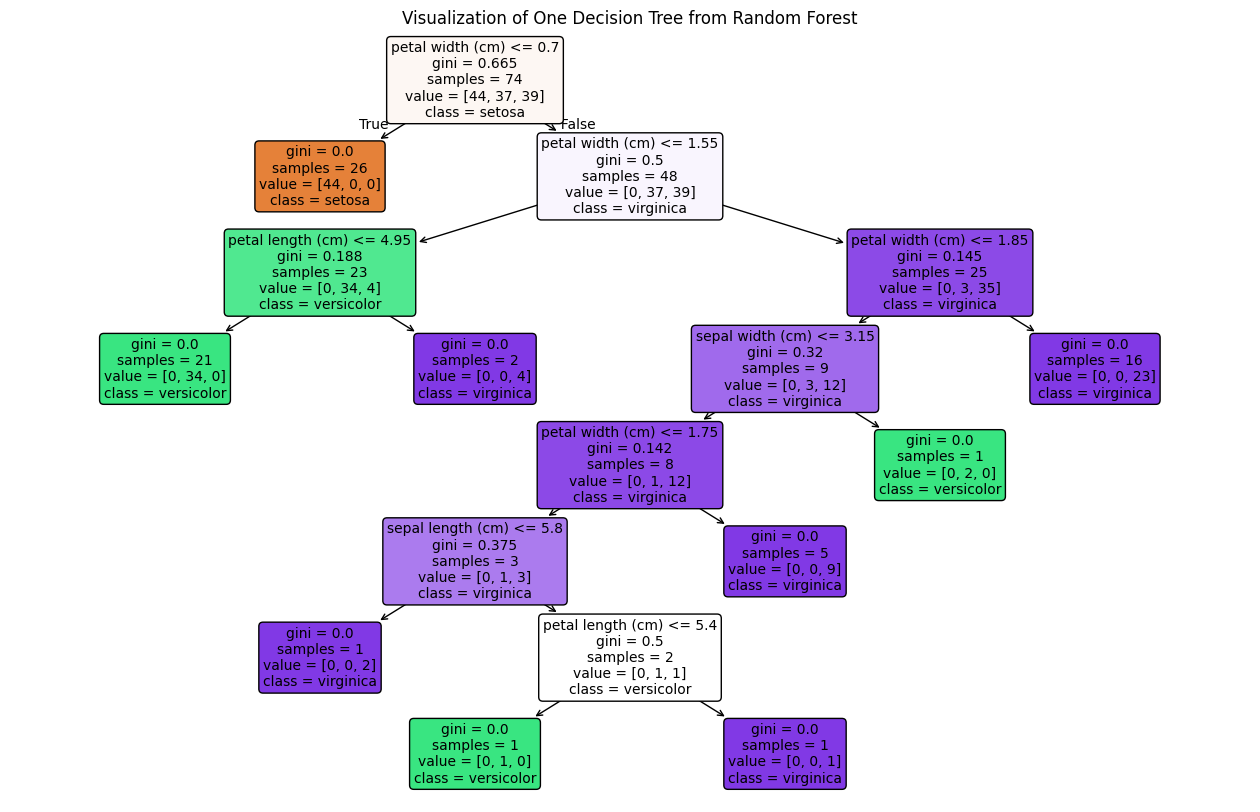

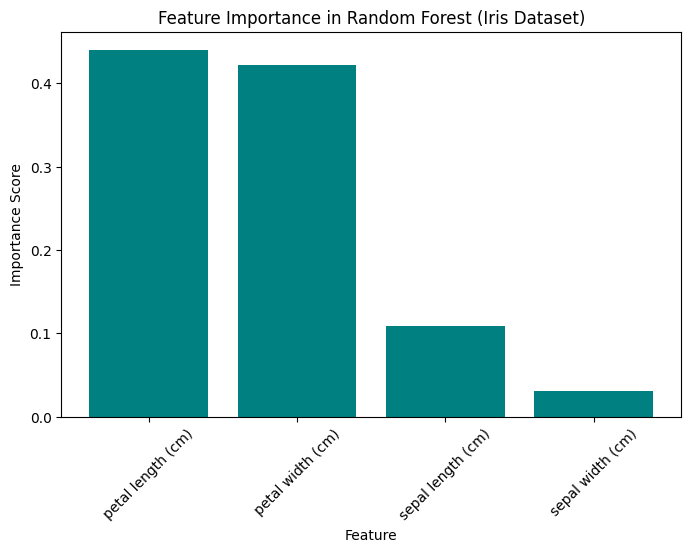


 Feature Importance Discussion:
Feature importance shows which input variables contribute the most to classification.
In the Iris dataset, 'petal length' and 'petal width' are usually most influential.
They strongly help the model distinguish between Iris Setosa, Versicolor, and Virginica species.


In [2]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 2. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data        # Input features
y = iris.target      # Target labels
feature_names = iris.feature_names
target_names = iris.target_names

# Display dataset info
print("Feature names:", feature_names)
print("Target classes:", target_names)
print("\nSample Data (first 5 rows):")
print(pd.DataFrame(X, columns=feature_names).head())

# 3. Split dataset into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train the Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100, random_state=42, max_depth=None
)
rf_clf.fit(X_train, y_train)

# Explanation of Ensemble Learning
print("\n Ensemble Learning Explanation:")
print("A Random Forest is an ensemble of Decision Trees.")
print("Instead of relying on one tree, it builds many trees on random subsets of data and features.")
print("The final prediction is made by majority voting among trees — reducing overfitting and improving accuracy.")

# 5. Evaluate Model Performance
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("\nTraining Accuracy:", round(train_acc, 3))
print("Testing Accuracy:", round(test_acc, 3))

print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="Greens",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - Random Forest (Iris)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6. Visualize one Decision Tree from the Ensemble
plt.figure(figsize=(16, 10))
tree.plot_tree(
    rf_clf.estimators_[0],
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualization of One Decision Tree from Random Forest")
plt.show()

# 7. Feature Importance Visualization
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), importances[indices], align='center', color='teal')
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.title("Feature Importance in Random Forest (Iris Dataset)")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

# Explanation of Feature Importance
print("\n Feature Importance Discussion:")
print("Feature importance shows which input variables contribute the most to classification.")
print("In the Iris dataset, 'petal length' and 'petal width' are usually most influential.")
print("They strongly help the model distinguish between Iris Setosa, Versicolor, and Virginica species.")
